# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
housing = pd.read_csv("../data/housing.csv")


In [94]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [95]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [96]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

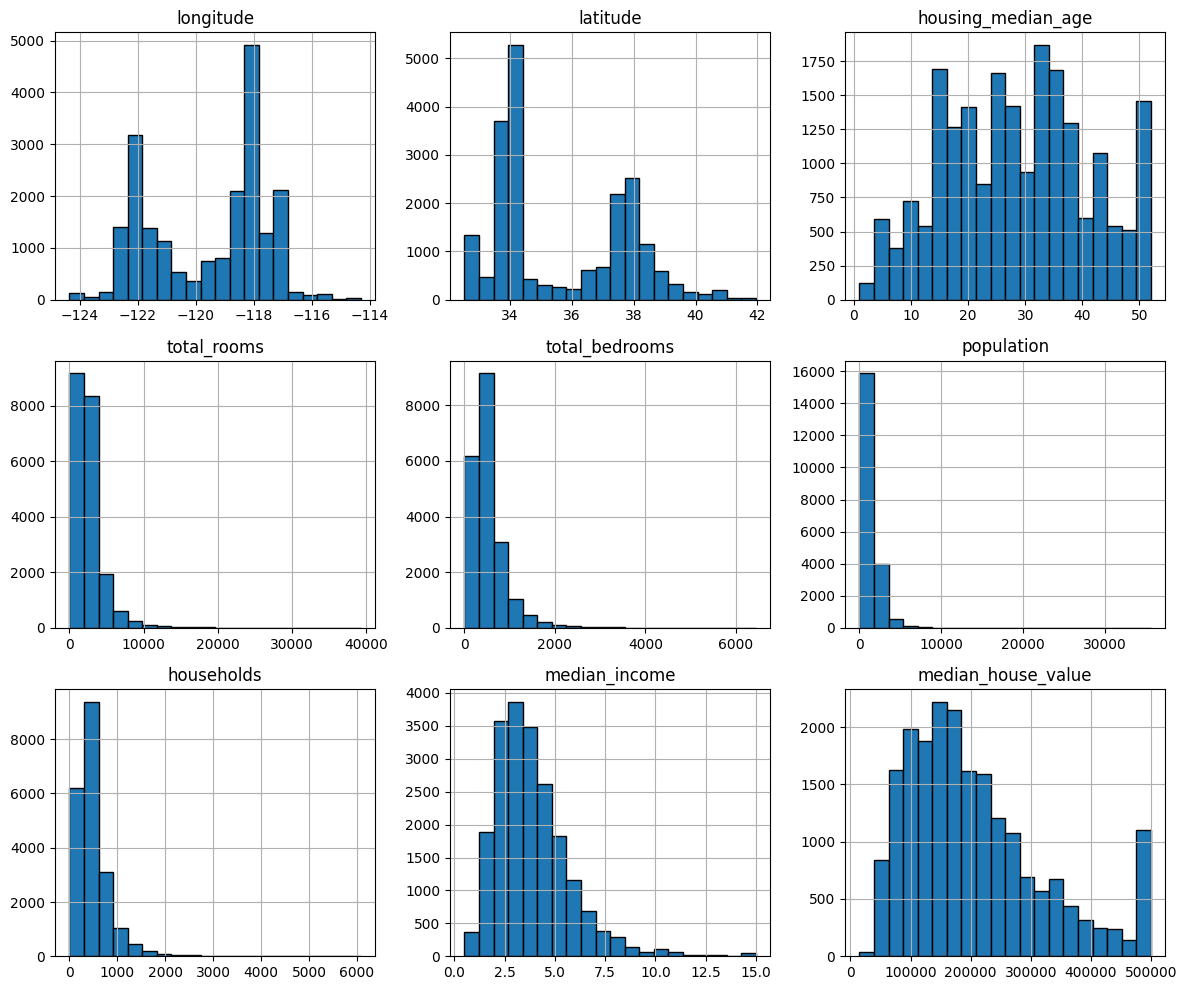

In [97]:
# Select numeric columns
numeric_cols = housing.select_dtypes(include='number')
# Create a histogram for each numeric column
numeric_cols.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [98]:
print(housing.isna().sum())
# filled total bedrooms with the mean
housing[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [99]:
print(housing.isna().sum())
# no more emtpy rows 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [100]:
housing["rooms per household"] = housing["total_rooms"] / housing["households"]

In [101]:
housing["population per household"] = housing["population"] /  housing["households"]

In [102]:
housing["bedrooms per room"] = housing["total_bedrooms"] /  housing["total_rooms"]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms per household,population per household,bedrooms per room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [103]:

print(len(housing))
max_index = housing['rooms per household'].idxmax()
min_index = housing['rooms per household'].idxmin()
housing = housing.drop(index=[max_index, min_index])


## Alternative approach:
# dropping max value
# housing = housing[housing["rooms per household"] != housing["rooms per household"].max()]
# # dropping min value
# housing = housing[housing["rooms per household"] != housing["rooms per household"].min()]

print(len(housing))

20640
20638


# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

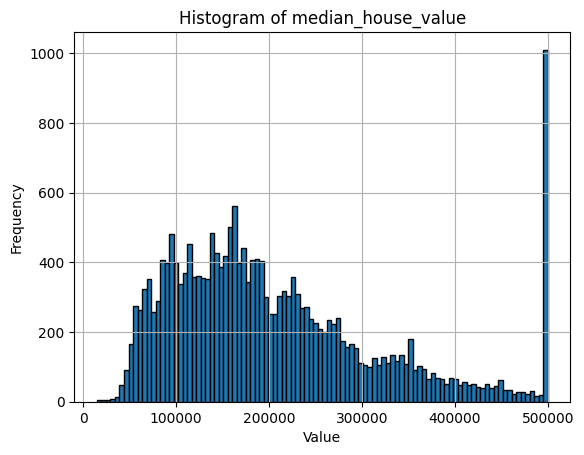

In [104]:
# Histogram for column 'median_house_value' with 100 bins
housing['median_house_value'].hist(bins=100, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of median_house_value')
plt.show()

2. Check out what variables correlates the most with "median house value"

In [105]:

target = "median_house_value"  
# Select numeric columns only and drop the target
metrics = housing.select_dtypes(include='number').columns.drop(target)

for metric in metrics:
    corr_xy = housing[metric].corr(housing[target])
    print(f"Correlation between {target} and {metric}: {corr_xy:.2f}")


# Highest Correlation between median_house_value and median_income: 0.69

Correlation between median_house_value and longitude: -0.05
Correlation between median_house_value and latitude: -0.14
Correlation between median_house_value and housing_median_age: 0.11
Correlation between median_house_value and total_rooms: 0.13
Correlation between median_house_value and total_bedrooms: 0.05
Correlation between median_house_value and population: -0.02
Correlation between median_house_value and households: 0.07
Correlation between median_house_value and median_income: 0.69
Correlation between median_house_value and rooms per household: 0.16
Correlation between median_house_value and population per household: -0.02
Correlation between median_house_value and bedrooms per room: -0.22


3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

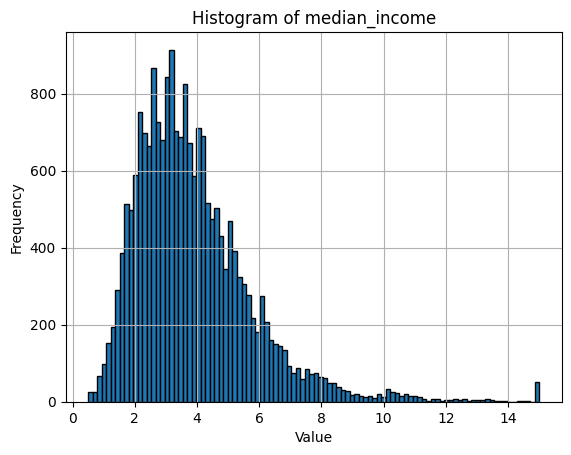

In [106]:
# Histogram for column 'median_house_value' with 100 bins
housing['median_income'].hist(bins=100, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of median_income')
plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

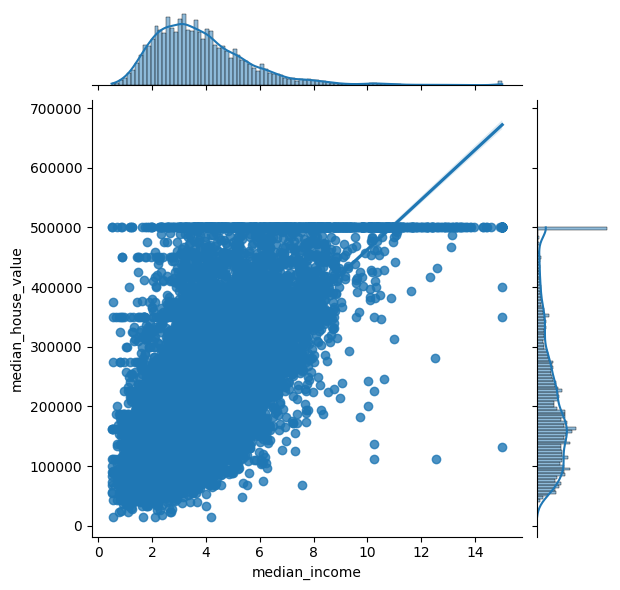

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(
    x="median_income", 
    y="median_house_value", 
    data=housing, 
    kind="reg",       # regression scatter plot
    marginal_kws=dict(bins=100, fill=True)  # histogram style
)

plt.show()

# There seems to be a high correlation but an upper limit to the median Hous Value
# it seems as though the column median_house_value was capped at 500000

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

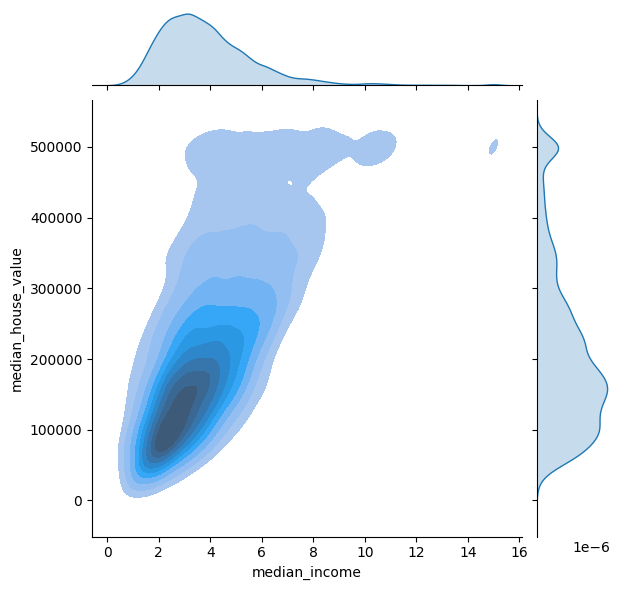

In [108]:
sns.jointplot(
    x="median_income", 
    y="median_house_value", 
    data=housing, 
    kind="kde",       # regression scatter plot
    fill=True         # fills the density contours
)

plt.show()


###
# reg when you care about linear relationships and regression prediction.
# kde when you care about density, clustering, and general distribution patterns.

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [109]:
# Define the quantiles and labels
quantiles = [0, 0.25, 0.5, 0.75, 0.95, 1]
labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"]

# Create the categorical column
housing["income_cat"] = pd.qcut(
    housing["median_income"],
    q=quantiles,
    labels=labels
)

# Check the result
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms per household,population per household,bedrooms per room,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096,Above_Average


2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

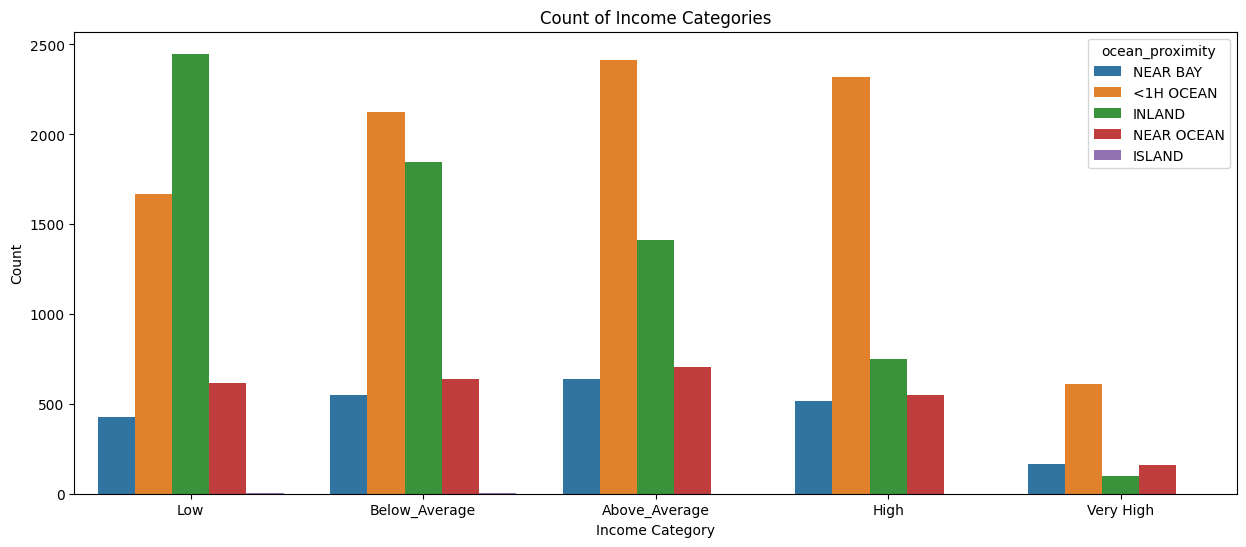

In [110]:


plt.figure(figsize=(15, 6))  # width=12, height=6
# Count plot for the "income_cat" column
sns.countplot(x="income_cat", data=housing, hue="ocean_proximity")

# Add title and labels
plt.title("Count of Income Categories")
plt.xlabel("Income Category")
plt.ylabel("Count")

plt.show()

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

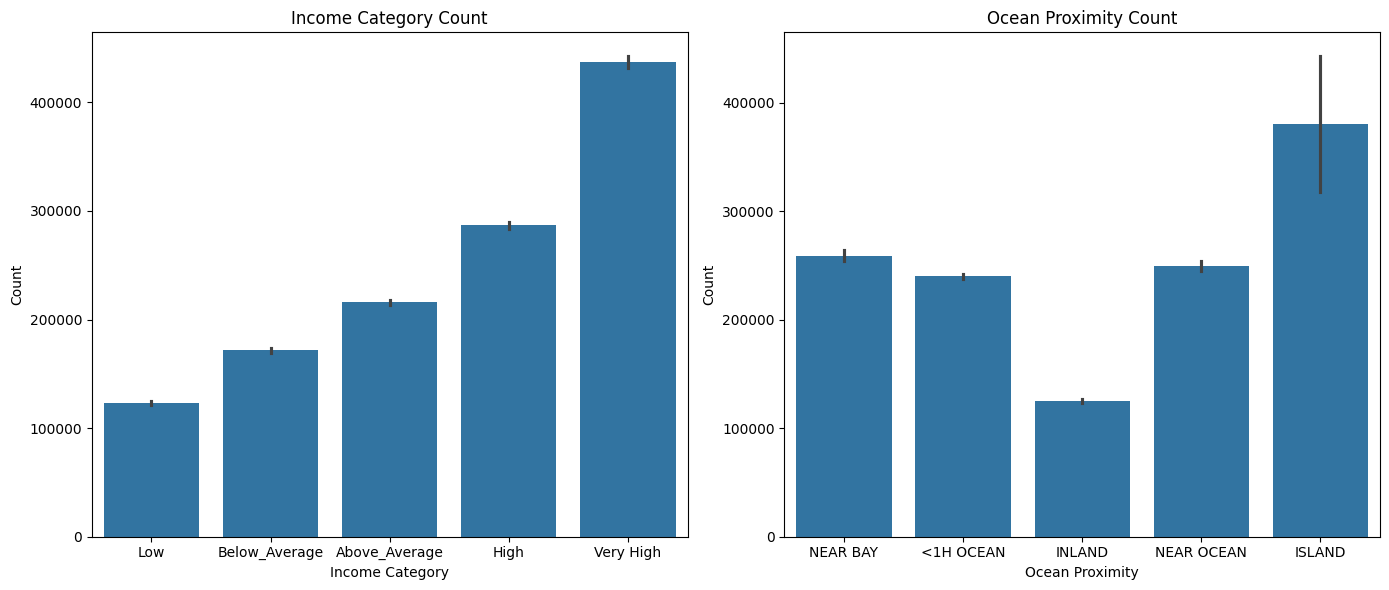

In [111]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # width=14, height=6

# First barplot
sns.barplot(y="median_house_value", x="income_cat", data=housing, ax=axes[0])
axes[0].set_title("Income Category Count")
axes[0].set_xlabel("Income Category")
axes[0].set_ylabel("Count")

# Second barplot (example: maybe by another categorical variable)
sns.barplot(y="median_house_value", x="ocean_proximity", data=housing, ax=axes[1])
axes[1].set_title("Ocean Proximity Count")
axes[1].set_xlabel("Ocean Proximity")
axes[1].set_ylabel("Count")

plt.tight_layout()  # adjusts spacing
plt.show()

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [112]:
# Example: pivoting housing data
pivot_df = housing.pivot_table(
    index="income_cat",          # rows
    columns="ocean_proximity",   # columns
    values="median_house_value", # values to fill the table
    aggfunc="mean"               #
)

pivot_df = pivot_df.drop(columns="ISLAND")
pivot_df

C:\Users\Friedrich\AppData\Local\Temp\ipykernel_31964\135346847.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = housing.pivot_table(


ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161286.295808,84599.590853,155709.169014,148132.739414
Below_Average,196951.657721,115214.944234,220160.244526,209471.397799
Above_Average,232015.206968,147710.575586,261706.026688,255610.000000
High,292114.036238,207970.902537,321968.963035,337934.853748
Very High,439648.851307,346034.531250,451015.078788,468739.723270


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

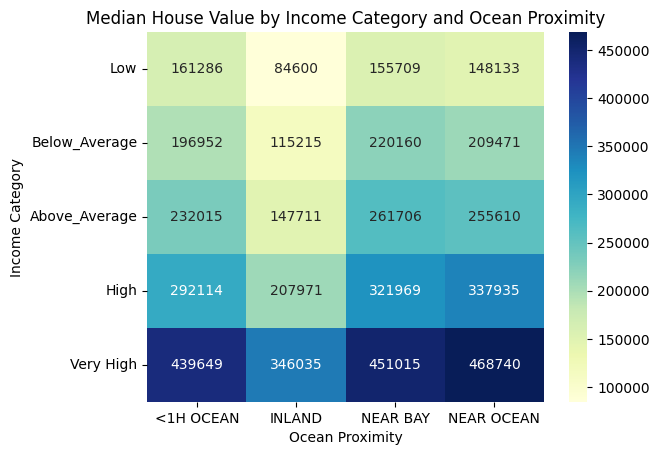

In [113]:
sns.heatmap(
    pivot_df,           # your pivoted DataFrame
    annot=True,         # show values in each cell
    fmt=".0f",          # number formatting
    cmap="YlGnBu"       # color map
)

plt.title("Median House Value by Income Category and Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Income Category")
plt.show()

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [ ]:
housing = housing.drop(columns="income_cat")


In [122]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms per household,population per household,bedrooms per room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096


2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [115]:
import scipy.stats as stats

In [ ]:
# Select floating point columns
float_cols = housing.select_dtypes(include='float').columns
# Apply Z-score standardization
z_scored = housing[float_cols].apply(lambda x: stats.zscore(x))

# Check result
z_scored.head()


20638

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [ ]:
# Select categorical columns (dtype 'object' or 'category')
cat_cols = housing.select_dtypes(include='object').columns

# Create dummy variables and drop the first column to avoid multicollinearity
housing_dummies = pd.get_dummies(housing[cat_cols], drop_first=True)

# Check the result
housing_dummies.head()


20638

4. Save our predicting variable to `y`.

In [126]:
# Save target variable to y
y = housing["median_house_value"]
len(y)

20638

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [131]:

X = pd.concat([z_scored, housing_dummies], axis=1)  # axis=0 means rows
X = X.drop(columns="median_house_value")
len(X)

20638

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [132]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [133]:
from sklearn.linear_model import LinearRegression

# Create the Linear Regression estimator
lm = LinearRegression()

In [ ]:
# Perform the fitting
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)



3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

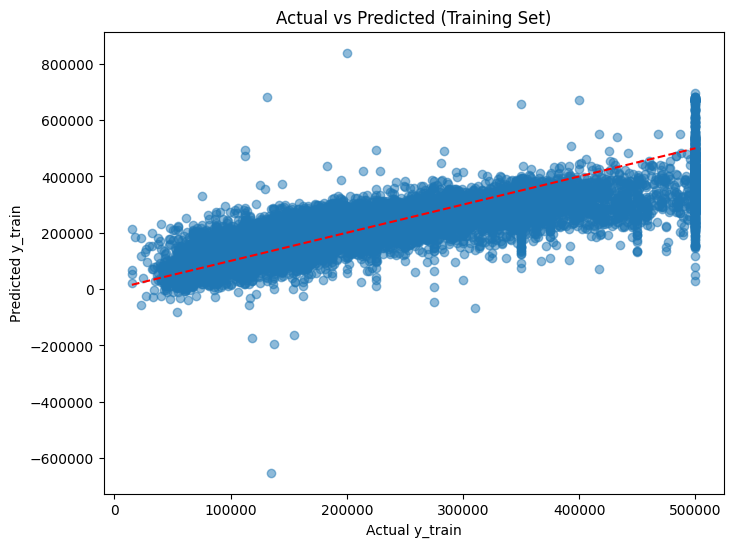

In [140]:
# Scatter plot of actual vs predicted (training set)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual y_train")
plt.ylabel("Predicted y_train")
plt.title("Actual vs Predicted (Training Set)")
plt.show()

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [145]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [148]:
# Compute Score
print('Score:')
print(r2_score(y_train, y_train_pred))

Score:
0.6494177711533091


In [154]:
# Compute MSE for training and testing sets
print('MSE:')
print(mean_squared_error(y_train_pred, y_train))
# mean squared error is high -> for every prediction there is on average a good chance that the prediction is off by 68.000 Dollar

MSE:
4658989841.357809


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

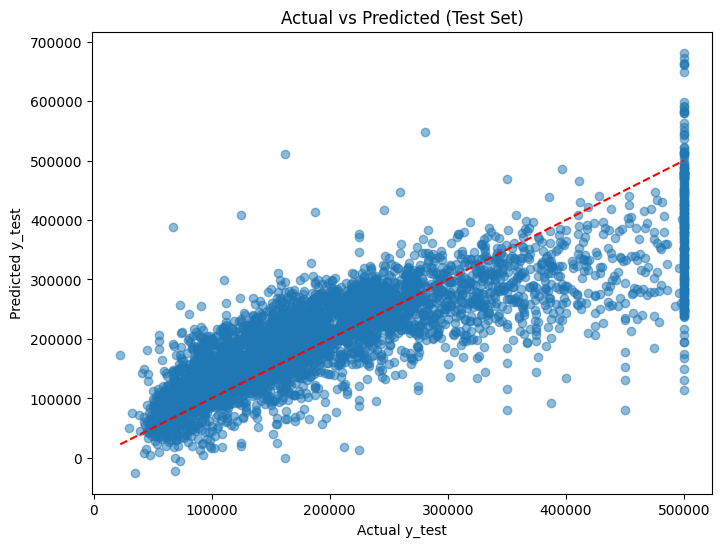

In [155]:
# Scatter plot of actual vs predicted (training set)
y_test_pred = lm.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual y_test")
plt.ylabel("Predicted y_test")
plt.title("Actual vs Predicted (Test Set)")
plt.show()

2. Print the mean_squared_error and R^2-score again. What has happened?

In [156]:
# Compute Score
print('Score:')
print(r2_score(y_test, y_test_pred))

# Compute MSE for training and testing sets
print('MSE:')
print(mean_squared_error(y_test_pred, y_test))

# The Test data has a very similar Error as the training data -> no over or underfitting

Score:
0.6453912009019874
MSE:
4753404558.029716


3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [157]:
# Compute MSE for training and testing sets
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test_pred, y_test)))

RMSE:
68944.93859617047


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [121]:
from sklearn.ensemble import RandomForestRegressor

2. Make prediction on the test data and evaluate you results.